#Importando as bibliotecas 


In [1]:
!pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 16.7 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=b4473c0084e77b9d9de724211855a1f3bbb455483239874279053951

In [2]:
import lightkurve as lk
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Baixando os dados da curva de luz

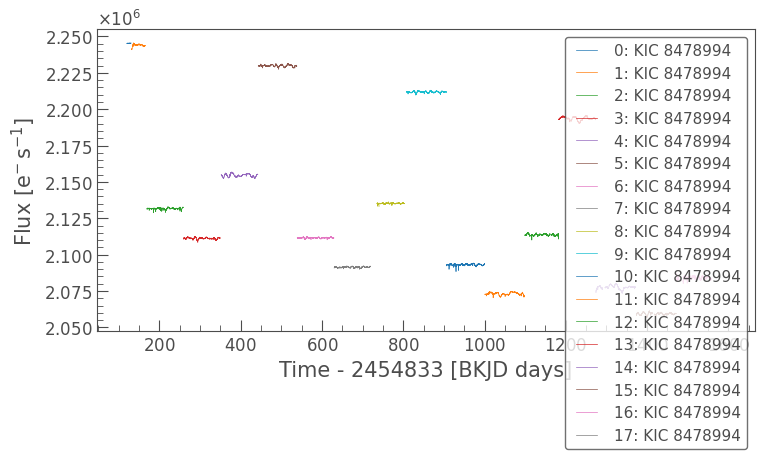

In [3]:
# Search for Kepler observations of Kepler-37
search_result = lk.search_lightcurve('Kepler-37', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [4]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr008478994,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr008478994,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr008478994,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr008478994,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr008478994,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr008478994,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr008478994,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr008478994,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr008478994,0.0


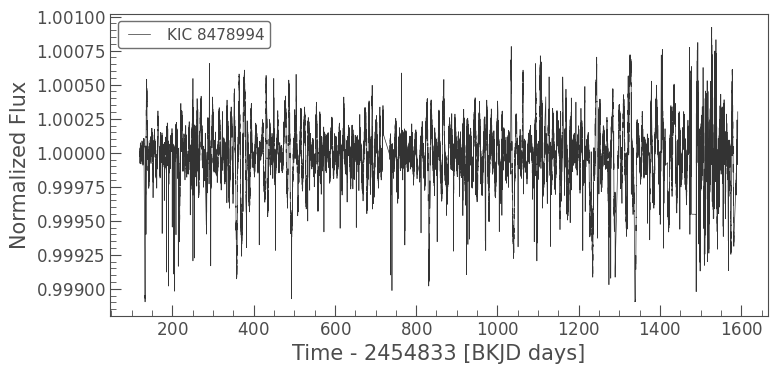

In [5]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

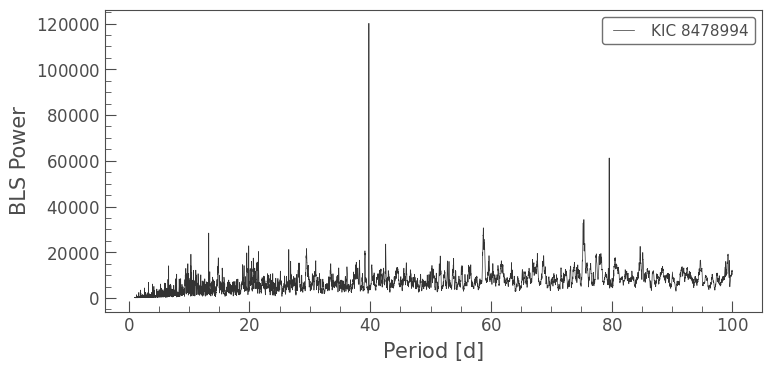

In [6]:
period = np.linspace(1, 100, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

##Importando as bases de dados

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [95]:
df100 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data100.csv')
df250 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data250.csv')
df500 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data500.csv')
df750 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data750.csv')
df1000 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data1000.csv')
df2000 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data2000.csv')

##Visualizando o formato do dataFrame

In [96]:
df100.tail()

,i1,i2,d
4945,96,98,0.979946
4946,96,99,0.969540
4947,97,98,0.990074
4948,97,99,0.979875
4949,98,99,0.989976


In [97]:
df250.tail()

,i1,i2,d
31120,246,248,0.992013
31121,246,249,0.987977
31122,247,248,0.996024
31123,247,249,0.992021
31124,248,249,0.996020


In [98]:
df500.tail()

,i1,i2,d
124745,496,498,0.996008
124746,496,499,0.994010
124747,497,498,0.997991
124748,497,499,0.996001
124749,498,499,0.997990


In [99]:
df750.tail()

,i1,i2,d
280870,746,748,0.997367
280871,746,749,0.996041
280872,747,748,0.998691
280873,747,749,0.997368
280874,748,749,0.998692


In [100]:
df1000.tail()

,i1,i2,d
499495,996,998,0.998003
499496,996,999,0.997007
499497,997,998,0.998996
499498,997,999,0.998002
499499,998,999,0.998995


In [101]:
df2000.tail()

,i1,i2,d
1998995,1996,1998,0.998986
1998996,1996,1999,0.998489
1998997,1997,1998,0.999483
1998998,1997,1999,0.998987
1998999,1998,1999,0.999484


##Ajuste no DataFrame

In [102]:
df100['dif'] = df100['i2'] - df100['i1']
df100.head()

,i1,i2,d,dif
0,0,1,0.989665,1
1,0,2,0.979156,2
2,0,3,0.968427,3
3,0,4,0.957589,4
4,0,5,0.946524,5


In [103]:
df250['dif'] = df250['i2'] - df250['i1']
df250.head()

,i1,i2,d,dif
0,0,1,0.995910,1
1,0,2,0.991792,2
2,0,3,0.987643,3
3,0,4,0.983455,4
4,0,5,0.979234,5


In [104]:
df500['dif'] = df500['i2'] - df500['i1']
df500.head()

,i1,i2,d,dif
0,0,1,0.997907,1
1,0,2,0.995834,2
2,0,3,0.993779,3
3,0,4,0.991714,4
4,0,5,0.989642,5


In [106]:
df750['dif'] = df750['i2'] - df750['i1']
df750.head()

,i1,i2,d,dif
0,0,1,0.998640,1
1,0,2,0.997262,2
2,0,3,0.995887,3
3,0,4,0.994504,4
4,0,5,0.993121,5


In [107]:
df1000['dif'] = df1000['i2'] - df1000['i1']
df1000.head()

,i1,i2,d,dif
0,0,1,0.998957,1
1,0,2,0.997930,2
2,0,3,0.996897,3
3,0,4,0.995858,4
4,0,5,0.994789,5


In [108]:
df2000['dif'] = df2000['i2'] - df2000['i1']
df2000.head()

,i1,i2,d,dif
0,0,1,0.999463,1
1,0,2,0.998949,2
2,0,3,0.998434,3
3,0,4,0.997919,4
4,0,5,0.997401,5


##Contruindo o dicionário de dados

In [109]:
dataDic100 = {}

with open('/content/gdrive/MyDrive/logArthur/data100.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic100:
            dataDic100[dif] = [d]
        else:
            dataDic100[dif].append(d)

In [110]:
dataDic250 = {}

with open('/content/gdrive/MyDrive/logArthur/data250.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic250:
            dataDic250[dif] = [d]
        else:
            dataDic250[dif].append(d)

In [111]:
dataDic500 = {}

with open('/content/gdrive/MyDrive/logArthur/data500.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic500:
            dataDic500[dif] = [d]
        else:
            dataDic500[dif].append(d)

In [112]:
dataDic750 = {}

with open('/content/gdrive/MyDrive/logArthur/data750.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic750:
            dataDic750[dif] = [d]
        else:
            dataDic750[dif].append(d)

In [113]:
dataDic1000 = {}

with open('/content/gdrive/MyDrive/logArthur/data1000.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic1000:
            dataDic1000[dif] = [d]
        else:
            dataDic1000[dif].append(d)

In [114]:
dataDic2000 = {}

with open('/content/gdrive/MyDrive/logArthur/data2000.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic2000:
            dataDic2000[dif] = [d]
        else:
            dataDic2000[dif].append(d)

#Plot dos Resultados

###100 pontos

In [115]:
eixoX100 = []
eixoY100 = []
for key in dataDic100:
    lisD = dataDic100[key]
    eixoX100.append(key)
    eixoY100.append(np.max(lisD))

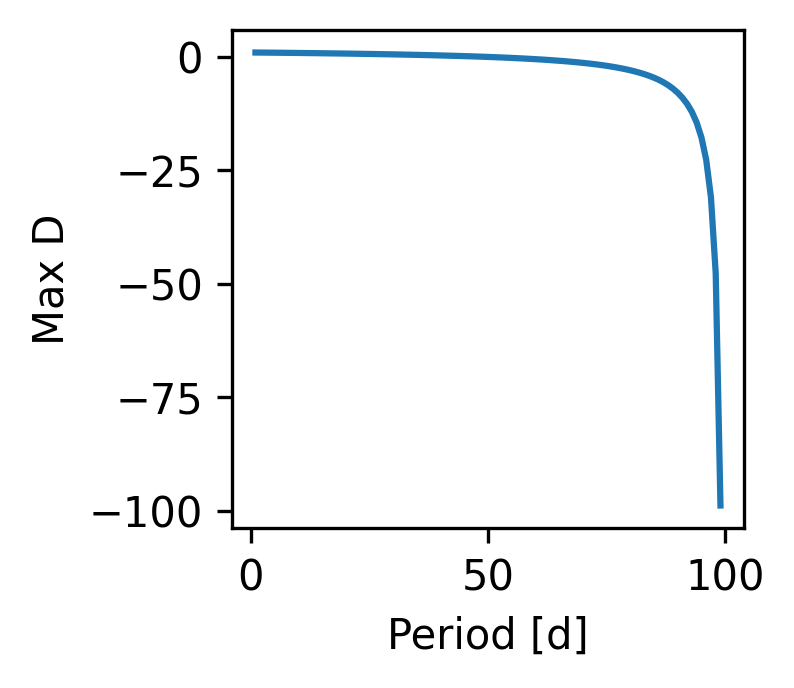

media100 = 0.0186664592099312


In [116]:
plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX100,eixoY100)
plt.xlabel("Period [d]")
plt.ylabel("Max D")
plt.show()

sum100 = np.sum(eixoY100[:79])
media100 = np.divide(sum100,80)
print(f'media100 = {media100}')

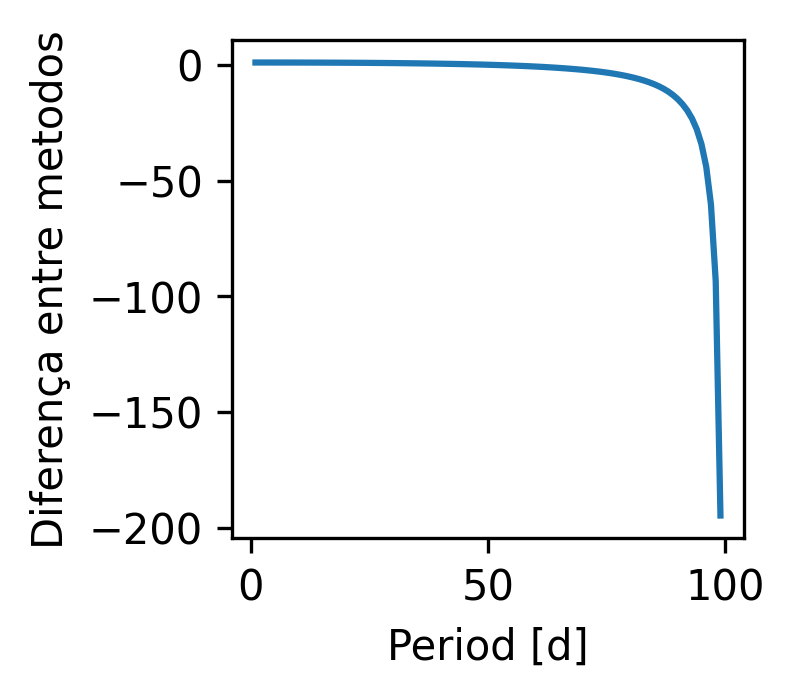

const100 = -0.14909166672913007


In [117]:
delta100 = [eixoY100[i] / np.array(bls.frequency[i]) for i in range(len(eixoY100))]

plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX100,delta100)
plt.xlabel("Period [d]")
plt.ylabel("Diferença entre metodos")
plt.show()

sum100 = np.sum(delta100[:79])
const100 = np.divide(sum100,89)
print(f'const100 = {const100}')

##250 pontos

In [118]:
eixoX250 = []
eixoY250 = []
for key in dataDic250:
    lisD = dataDic250[key]
    eixoX250.append(key)
    eixoY250.append(np.max(lisD))

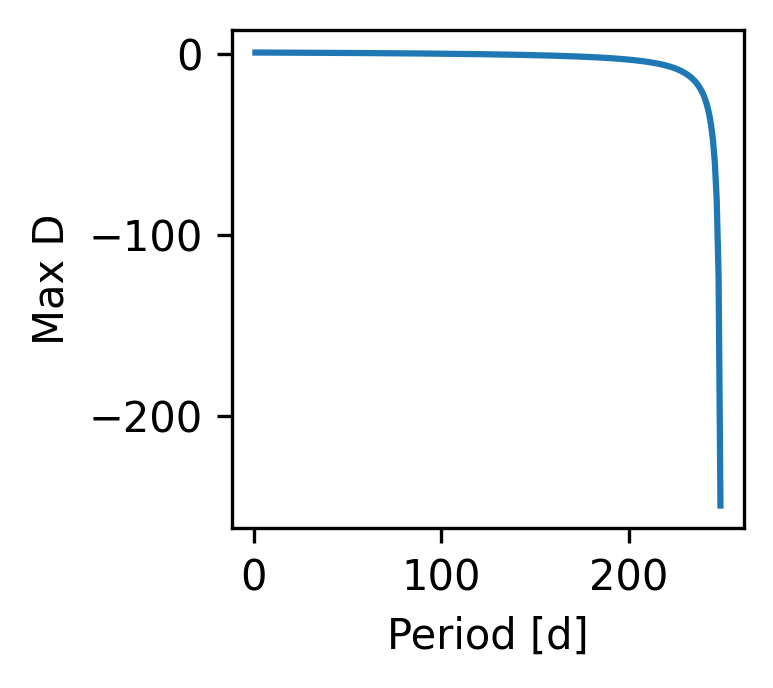

media250 = 0.01093826389238444


In [119]:
plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX250,eixoY250)
plt.xlabel("Period [d]")
plt.ylabel("Max D")
plt.show()

sum250 = np.sum(eixoY250[:199])
media250 = np.divide(sum250,200)
print(f'media250 = {media250}')

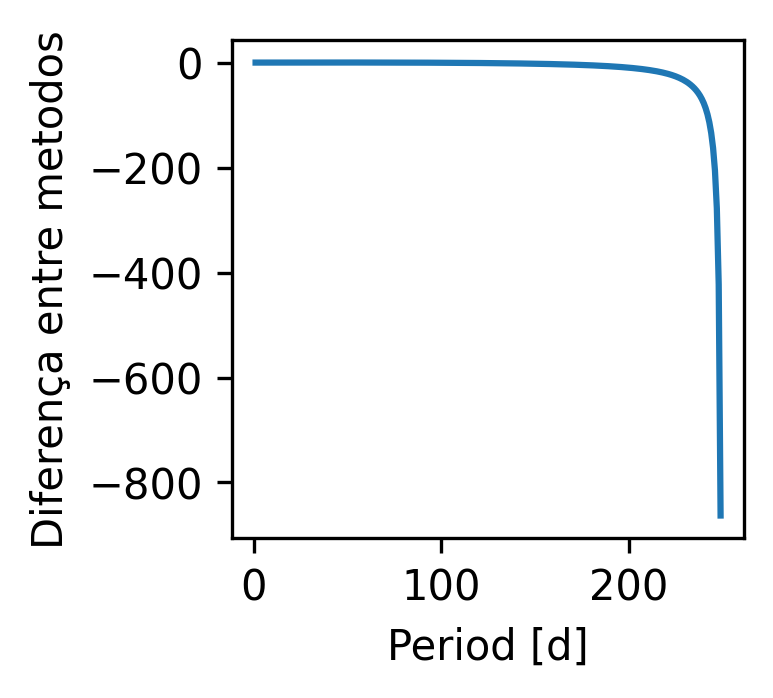

const250 = -0.472169641169655


In [120]:
delta250 = [eixoY250[i] / np.array(bls.frequency[i]) for i in range(len(eixoY250))]

plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX250,delta250)
plt.xlabel("Period [d]")
plt.ylabel("Diferença entre metodos")
plt.show()

sum250 = np.sum(delta250[:199])
const250 = np.divide(sum250,200)
print(f'const250 = {const250}')

##500 pontos

In [121]:
eixoX500 = []
eixoY500 = []
for key in dataDic500:
    lisD = dataDic500[key]
    eixoX500.append(key)
    eixoY500.append(np.max(lisD))

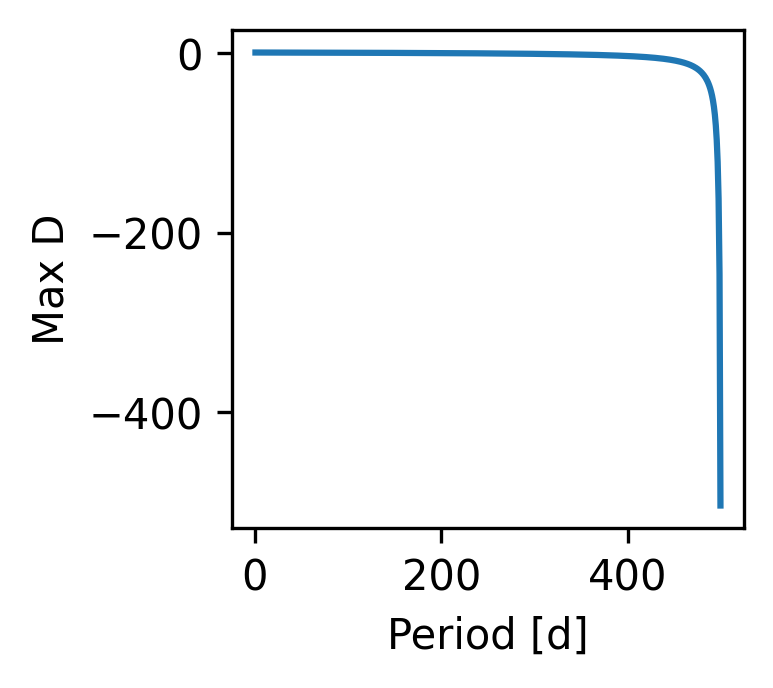

media500 = 0.0077209838469318726


In [122]:
plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX500,eixoY500)
plt.xlabel("Period [d]")
plt.ylabel("Max D")
plt.show()

sum500 = np.sum(eixoY500[:399])
media500 = np.divide(sum500,400)
print(f'media500 = {media500}')

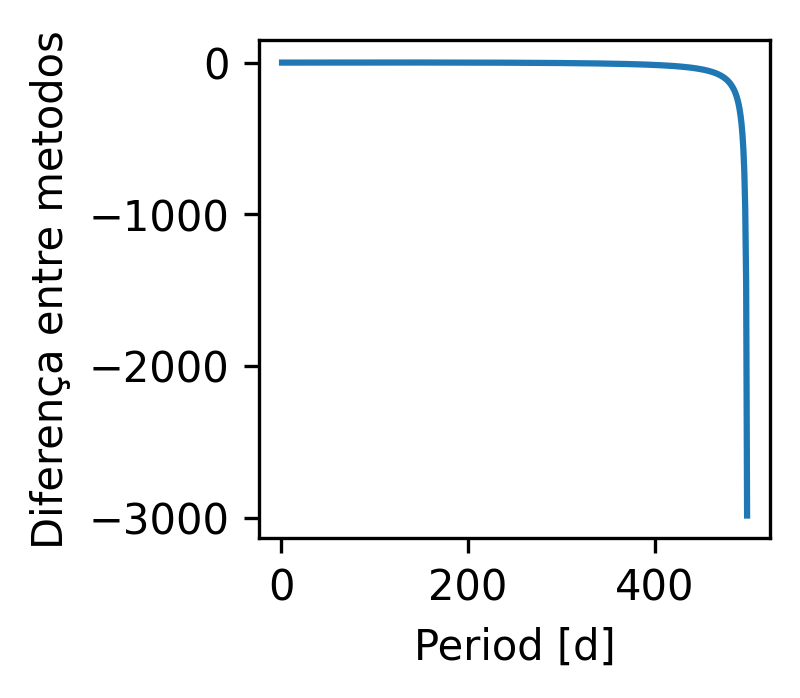

const500 = -0.9755006715544141


In [123]:
delta500 = [eixoY500[i] / np.array(bls.frequency[i]) for i in range(len(eixoY500))]

plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX500,delta500)
plt.xlabel("Period [d]")
plt.ylabel("Diferença entre metodos")
plt.show()

sum500 = np.sum(delta500[:399])
const500 = np.divide(sum500,400)
print(f'const500 = {const500}')

##750 pontos

In [124]:
eixoX750 = []
eixoY750 = []
for key in dataDic750:
    lisD = dataDic750[key]
    eixoX750.append(key)
    eixoY750.append(np.max(lisD))

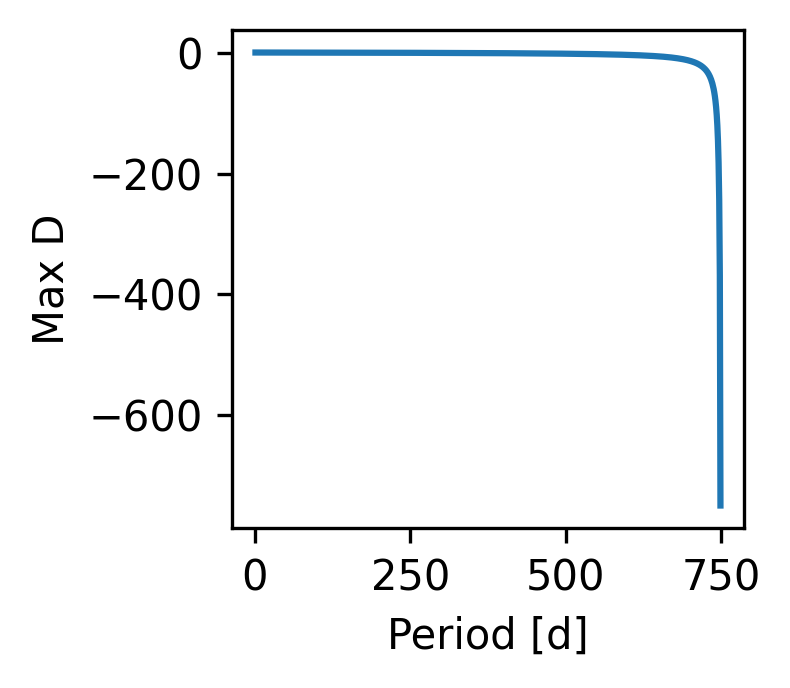

media750 = 0.0067340049265988


In [125]:
plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX750,eixoY750)
plt.xlabel("Period [d]")
plt.ylabel("Max D")
plt.show()

sum750 = np.sum(eixoY750[:599])
media750 = np.divide(sum750,600)
print(f'media750 = {media750}')

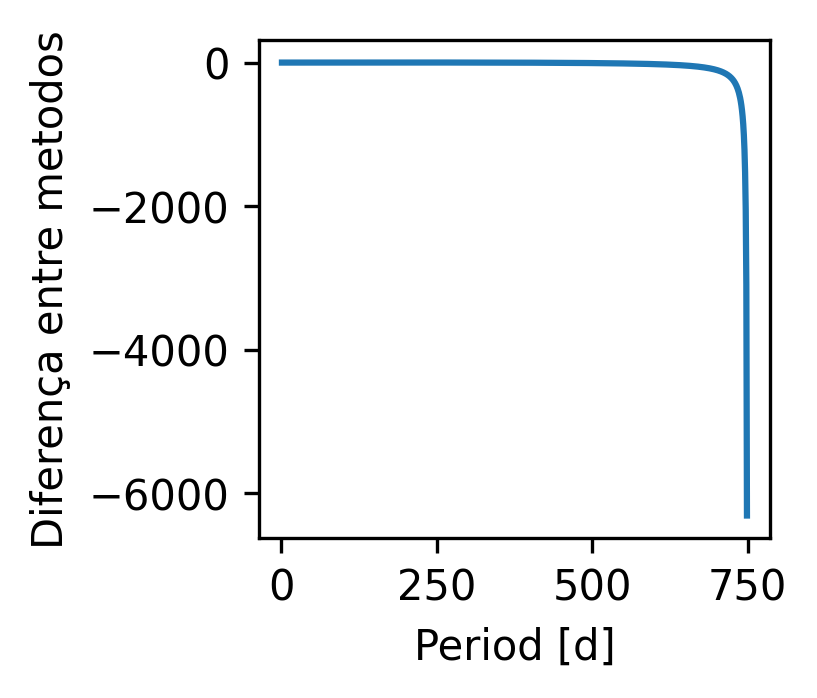

const750 = -1.476087989005555


In [126]:
delta750 = [eixoY750[i] / np.array(bls.frequency[i]) for i in range(len(eixoY750))]

plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX750,delta750)
plt.xlabel("Period [d]")
plt.ylabel("Diferença entre metodos")
plt.show()

sum750 = np.sum(delta750[:599])
const750 = np.divide(sum750,600)
print(f'const750 = {const750}')

##1000 pontos

In [127]:
eixoX1000 = []
eixoY1000 = []
for key in dataDic100:
    lisD = dataDic100[key]
    eixoX1000.append(key)
    eixoY1000.append(np.max(lisD))

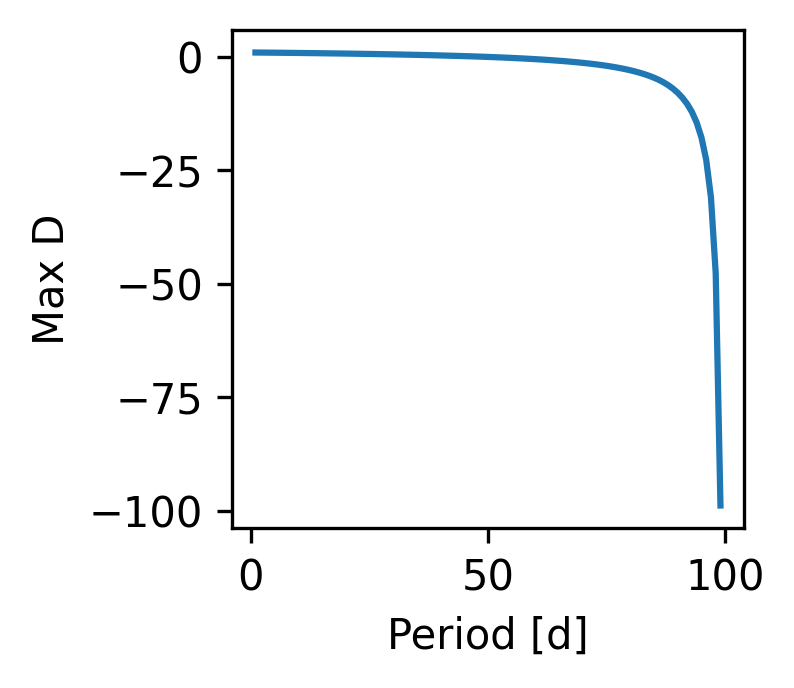

media1000 = -0.3952538767244601


In [128]:
plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX1000,eixoY1000)
plt.xlabel("Period [d]")
plt.ylabel("Max D")
plt.show()

sum1000 = np.sum(eixoY1000[:799])
media1000 = np.divide(sum1000,800)
print(f'media1000 = {media1000}')

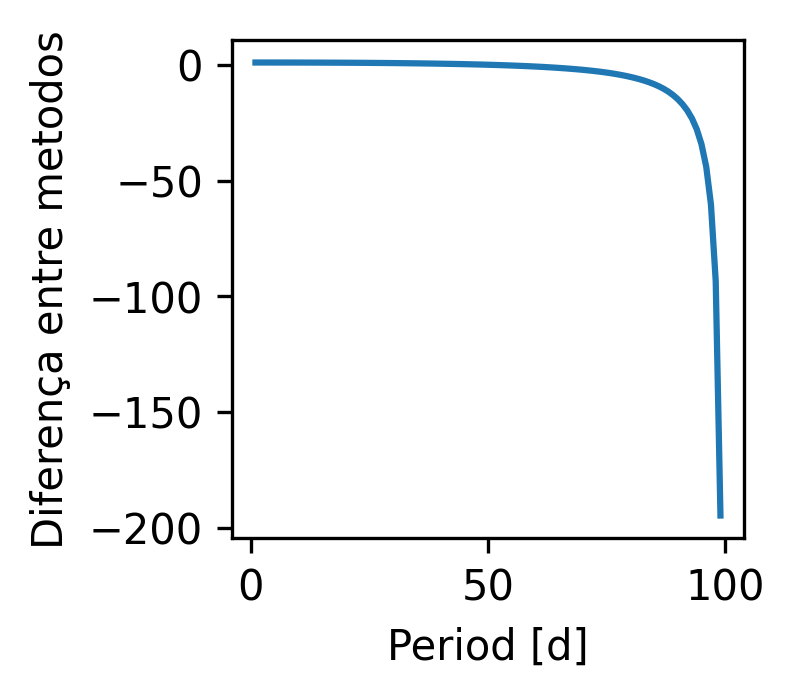

const1000 = -0.7836986268799271


In [129]:
delta1000 = [eixoY1000[i] / np.array(bls.frequency[i]) for i in range(len(eixoY1000))]

plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX1000,delta1000)
plt.xlabel("Period [d]")
plt.ylabel("Diferença entre metodos")
plt.show()

sum1000 = np.sum(delta1000[:799])
const1000 = np.divide(sum1000,800)
print(f'const1000 = {const1000}')

##Para 2000 pontos

In [130]:
eixoX2000 = []
eixoY2000 = []
for key in dataDic2000:
    lisD = dataDic2000[key]
    eixoX2000.append(key)
    eixoY2000.append(np.max(lisD))

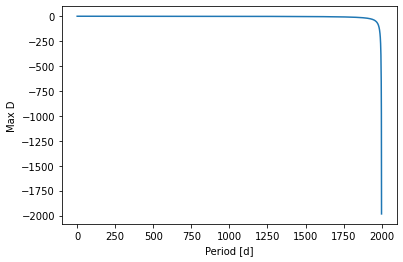

media2000 = -0.21807110439970212


In [151]:
# plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX2000,eixoY2000)
plt.xlabel("Period [d]")
plt.ylabel("Max D")
plt.show()

sum2000 = np.sum(eixoY1000[:1449])
media2000 = np.divide(sum2000,1450)
print(f'media2000 = {media2000}')

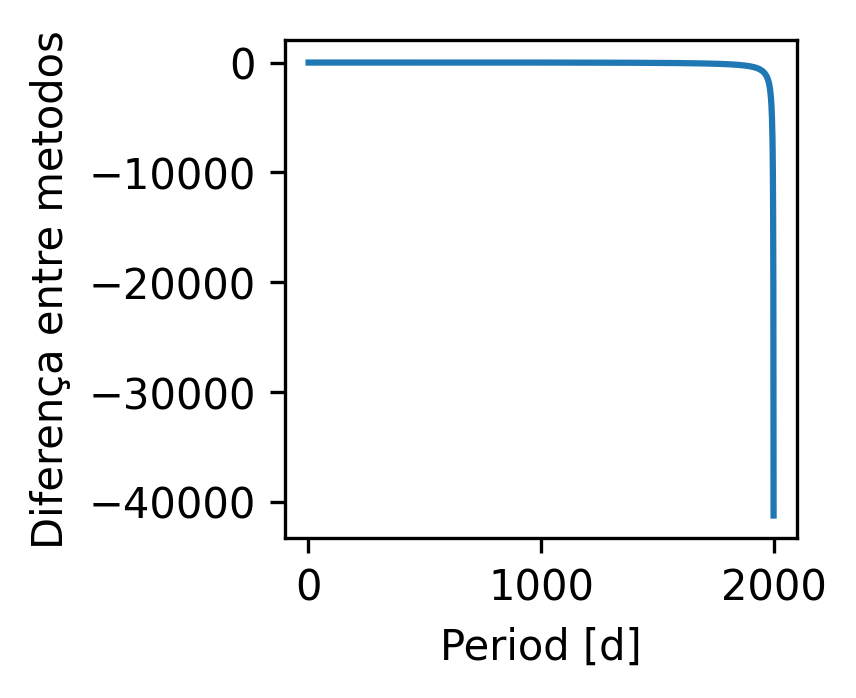

const2000 = -0.7180246929329267


In [152]:
delta2000 = [eixoY2000[i] / np.array(bls.frequency[i]) for i in range(len(eixoY2000))]

plt.figure(figsize=(2.2, 2.2),dpi=300)
plt.plot(eixoX2000,delta2000)
plt.xlabel("Period [d]")
plt.ylabel("Diferença entre metodos")
plt.show()

sum2000 = np.sum(delta2000[:1449])
const2000 = np.divide(sum2000,1450)
print(f'const2000 = {const2000}')

##Plot das constantes

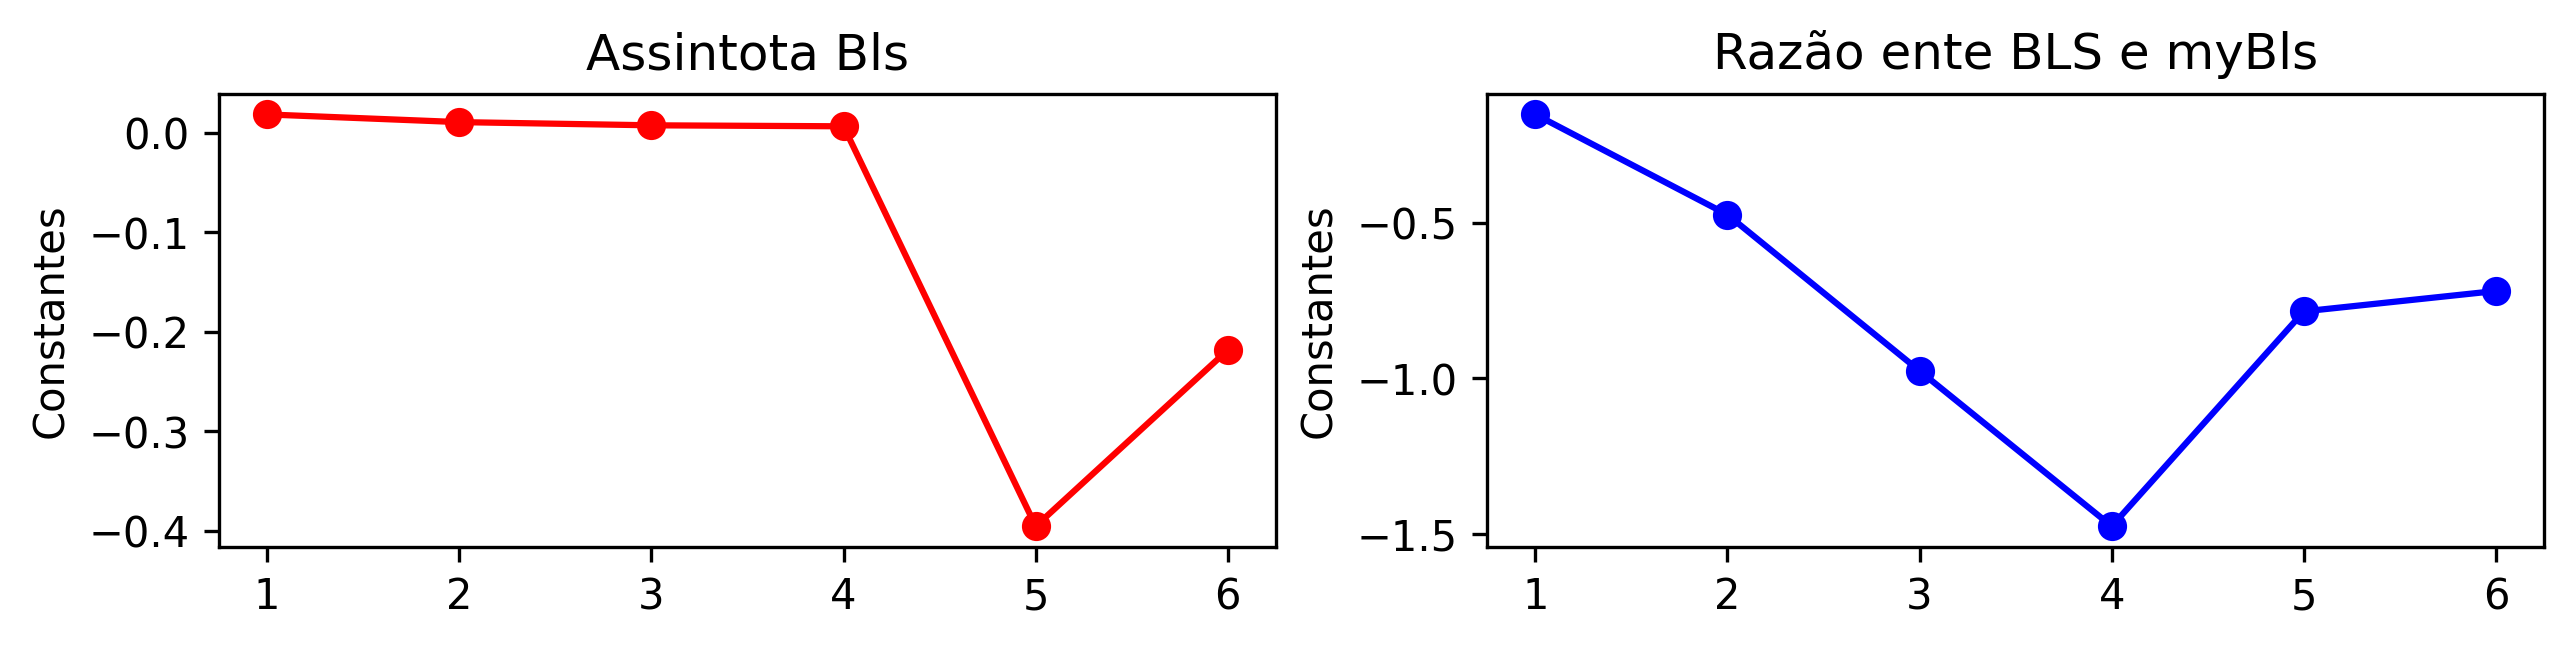

In [155]:
lisMedia = [media100,media250,media500,media750,media1000,media2000]
lisConst = [const100,const250,const500,const750,const1000,const2000]
eixoX = np.arange(1,7,1)

plt.figure(figsize=(10, 2), dpi=300)

m = plt.subplot(1,2,1)
m.plot(eixoX,lisMedia,'r-o')
m.set_title("Assintota Bls")
m.set_ylabel('Constantes')

c = plt.subplot(1,2,2)
c.plot(eixoX,lisConst,'b-o')
c.set_title("Razão ente BLS e myBls")
c.set_ylabel('Constantes')

plt.show()

In [156]:
lisAux = [100,250,500,750,1000,2000] 

for i in range(len(lisConst)):
    print(f'Para {lisAux[i]} pontos, const = {lisConst[i]}')

Para 100 pontos, const = -0.14909166672913007
Para 250 pontos, const = -0.472169641169655
Para 500 pontos, const = -0.9755006715544141
Para 750 pontos, const = -1.476087989005555
Para 1000 pontos, const = -0.7836986268799271
Para 2000 pontos, const = -0.7180246929329267
